In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation
import pandas as pd
from pathlib import Path

In [2]:
########Mathematical Constants#######
pi = 3.141592

########Physical Constants########

c = 2.99792458*10**10 #[cm s-1]
G = 6.67408*(10**(-8)) #[cm3 g-1 s-2]
h = 6.6260755*10**(-27) #[erg s]
h_bar = h/2/np.pi
k_B = 1.380658*10**(-16) #[erg K-1]
m_e = 9.1093897e-28 #[g]
m_p = 1.6726219e-24 #[g]
e = 4.8032068e-10 #[esu]
sigma_T = 0.665*1e-24 #[cm2]
sigma_B = 5.59e-5 #[erg cm-2 s-1 K-4] cf. Stephan Boltzmann law

########Astronomical Units########

pc = 3.0856776*10**18 #[cm]
kpc = 3.0856776*10**21 #[cm]
Mpc = 3.0856776*10**24 #[cm]
AU = 1.4959787066*10**13 #[cm]
ly = 9.460730472*10**17 #[cm]
Msun = 1.9891*10**33 #[g]
Rsun = 6.95508*10**10 #[cm]
Lsun = 3.845*10**33 #[erg s-1]
eV = 1.60218e-12 #[erg]

#######Units########
yr = 365*24*60*60
Myr = yr*1e6
km = 1e5
s = 1

MovieWriter imagemagick unavailable; using Pillow instead.


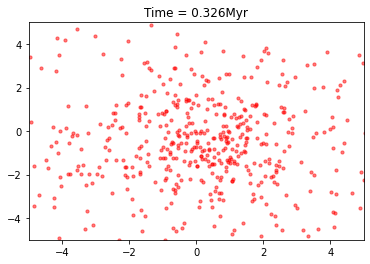

In [7]:
init0 = np.loadtxt("withoutgpu_basic/particle1.dat",usecols = range(7))
ix0 = init0.T[1]
iy0 = init0.T[2]

#init1 = np.loadtxt("earth_sun_16/particle1.dat",usecols = range(7))
#ix1 = init1.T[1]
#iy1 = init1.T[2]

#init2 = np.loadtxt("earth_sun_8/particle1.dat",usecols = range(7))
#ix2 = init2.T[1]
#iy2 = init2.T[2]

fig = plt.figure()
ax = plt.axes(xlim=(-5, 5), ylim=(-5, 5))
scat1 = ax.scatter(ix0, iy0, s=10, alpha = 0.5, color = 'r',label='0.005')
#scat2 = ax.scatter(ix1, iy1, s=20, alpha = 0.5, color = 'g',label='0.01')
#scat3 = ax.scatter(ix2, iy2, s=20, alpha = 0.5, color = 'b',label='0.02')

label = plt.title("Time = 0.00Myr", color="Black")

def update(i):
    
    num1 = i*10+1
    #num2 = i*8+1
    #num3 = i*4+1
    
    time = round(num1*0.04*0.0166,4)
    
    filename1 = "withoutgpu_basic/particle{}.dat".format(num1)
    #filename2 = "earth_sun_16/particle{}.dat".format(num2)
    #filename3 = "earth_sun_8/particle{}.dat".format(num3)
    
    data1 = np.loadtxt(filename1,usecols = range(7))
    #data2 = np.loadtxt(filename2,usecols = range(7))
    #data3 = np.loadtxt(filename3,usecols = range(7))
    
    x1 = data1.T[1]
    y1 = data1.T[2]
    #x2 = data2.T[1]
    #y2 = data2.T[2]
    #x3 = data3.T[1]
    #y3 = data3.T[2]
    
    position1 = np.stack([x1, y1])
    #position2 = np.stack([x2, y2])
    #position3 = np.stack([x3, y3])
    
    scat1.set_offsets(position1.T)
    #scat2.set_offsets(position2.T)
    #scat3.set_offsets(position3.T)
    
    label.set_text("Time = {}Myr".format(time))

    return scat1#,scat2,scat3

ani = animation.FuncAnimation(fig, update, frames=50)
ani.save('star_cluster_test4.gif', writer='imagemagick', fps=3, dpi=100)